In [12]:
import pandas as pd
import matplotlib.pyplot as plt

unit_df = pd.read_csv('../Data/Unit.csv')

# Display the first few rows of the dataframe to understand its structure and contents
unit_df.head()


,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Unit.Type,Method,Max.Heat,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions,CO2.emissions.biogenic.
0,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,176.7,0.0,0.0,0.0
1,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,154.7,0.0,0.0,0.0
2,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,84.4,0.0,0.0,0.0
3,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,78.9,0.0,0.0,0.0
4,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2020,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,90.7,0.0,0.0,0.0


## Unit Type vs. Emissions:

Create a bar chart to compare the total emissions (CO2 non-biogenic, Methane, Nitrous Oxide, and CO2 biogenic) by Unit.Type. This will help identify which types of units are associated with higher emissions.

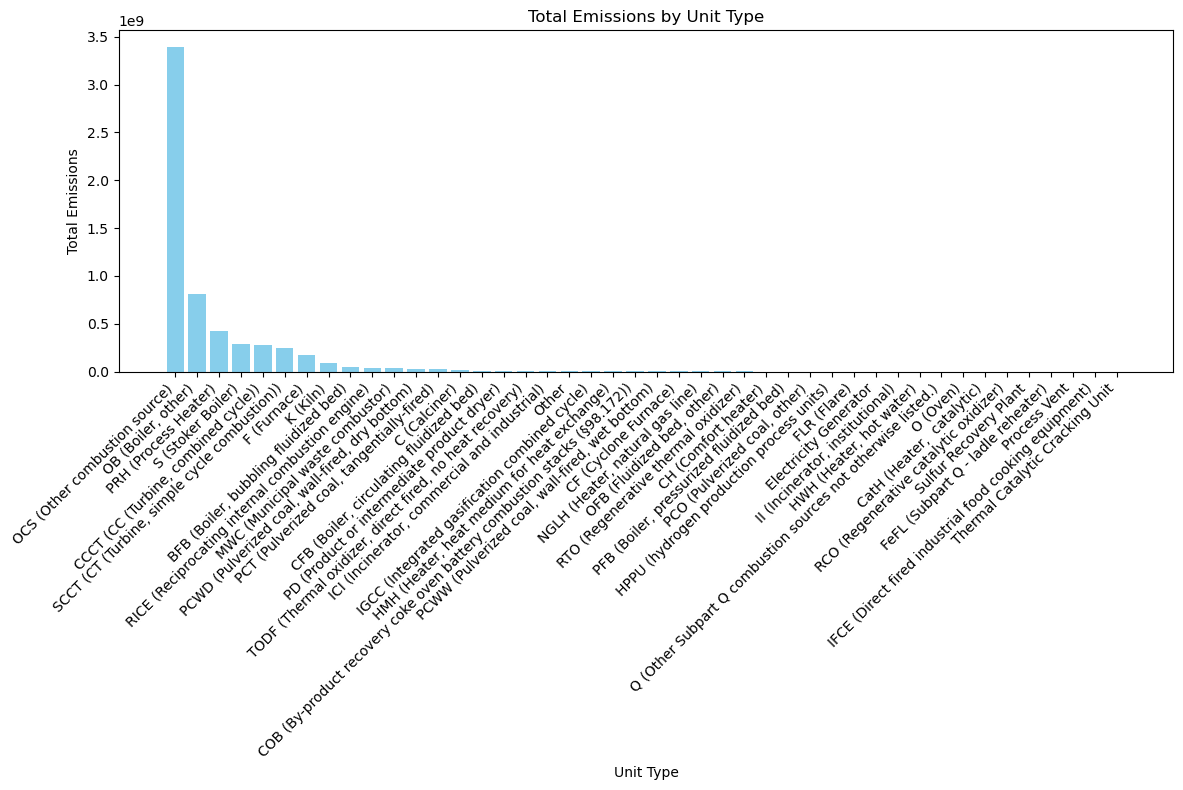

In [13]:
# Aggregating emissions data by Unit.Type

unit_type_emissions = unit_df.groupby('Unit.Type').agg({
    'CO2.emissions.non.biogenic.': 'sum',
    'Methane.emissions': 'sum',
    'Nitrous.Oxide.emissions': 'sum',
    'CO2.emissions.biogenic.': 'sum'
}).reset_index()

# Recalculating total emissions for each Unit.Type after the reset
unit_type_emissions['Total.Emissions'] = unit_type_emissions[['CO2.emissions.non.biogenic.', 'Methane.emissions', 'Nitrous.Oxide.emissions', 'CO2.emissions.biogenic.']].sum(axis=1)

# Sorting the data for better visualization
unit_type_emissions_sorted = unit_type_emissions.sort_values('Total.Emissions', ascending=False)

# Plotting the total emissions by Unit.Type
plt.figure(figsize=(12, 8))
plt.bar(unit_type_emissions_sorted['Unit.Type'], unit_type_emissions_sorted['Total.Emissions'], color='skyblue')
plt.title('Total Emissions by Unit Type')
plt.xlabel('Unit Type')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


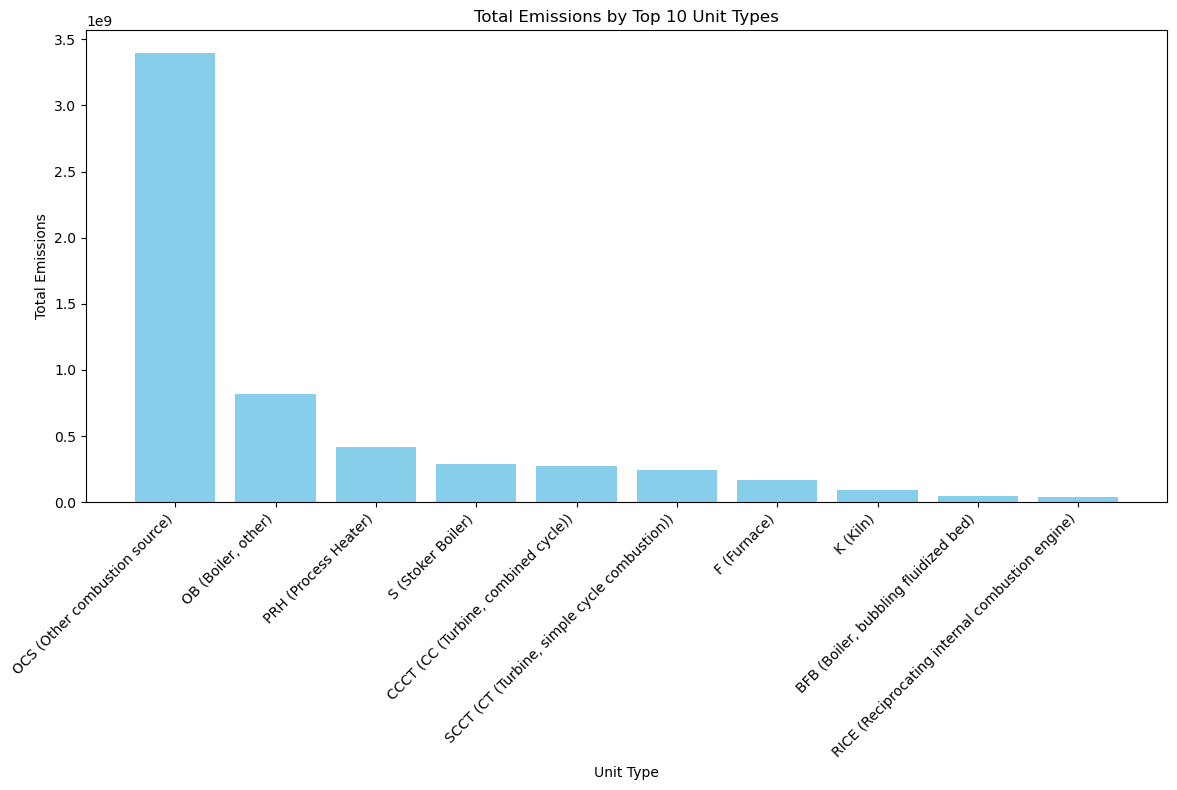

In [15]:
# Selecting the top 10 unit types based on total emissions for a clearer visualization as its hard to read the labels
top_10_unit_types = unit_type_emissions_sorted.head(10)

# Plotting the total emissions for the top 10 unit types
plt.figure(figsize=(12, 8))
plt.bar(top_10_unit_types['Unit.Type'], top_10_unit_types['Total.Emissions'], color='skyblue')
plt.title('Total Emissions by Top 10 Unit Types')
plt.xlabel('Unit Type')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## Heat Capacity vs. Emissions:

A scatter plot showing the relationship between Max.Heat and total emissions for each unit could reveal if there's a correlation between the heat capacity of a unit and its emissions.

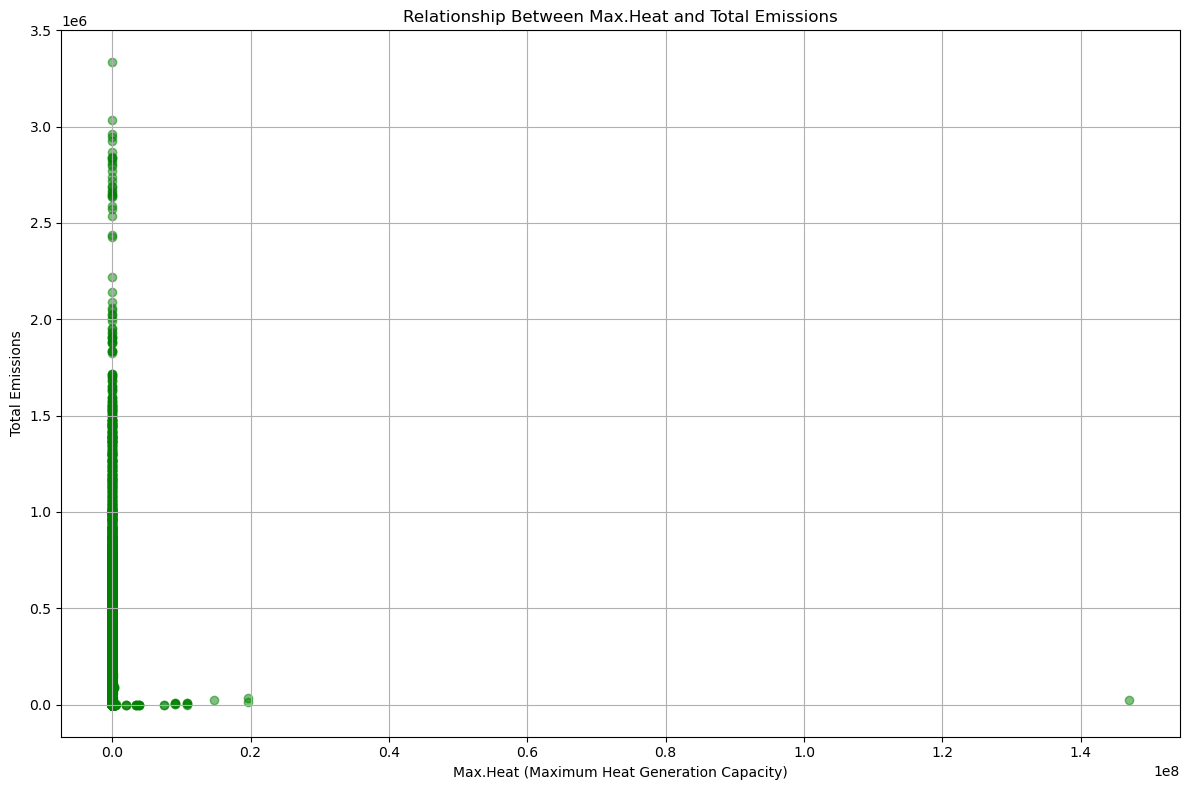

In [19]:
# Calculating total emissions for each unit in the dataframe
unit_df['Total.Emissions'] = unit_df[['CO2.emissions.non.biogenic.', 'Methane.emissions', 'Nitrous.Oxide.emissions', 'CO2.emissions.biogenic.']].sum(axis=1)

# Creating a scatter plot to explore the relationship between Max.Heat and Total Emissions
plt.figure(figsize=(12, 8))
plt.scatter(unit_df['Max.Heat'], unit_df['Total.Emissions'], alpha=0.5, color='green')
plt.title('Relationship Between Max.Heat and Total Emissions')
plt.xlabel('Max.Heat (Maximum Heat Generation Capacity)')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.tight_layout()

plt.show()


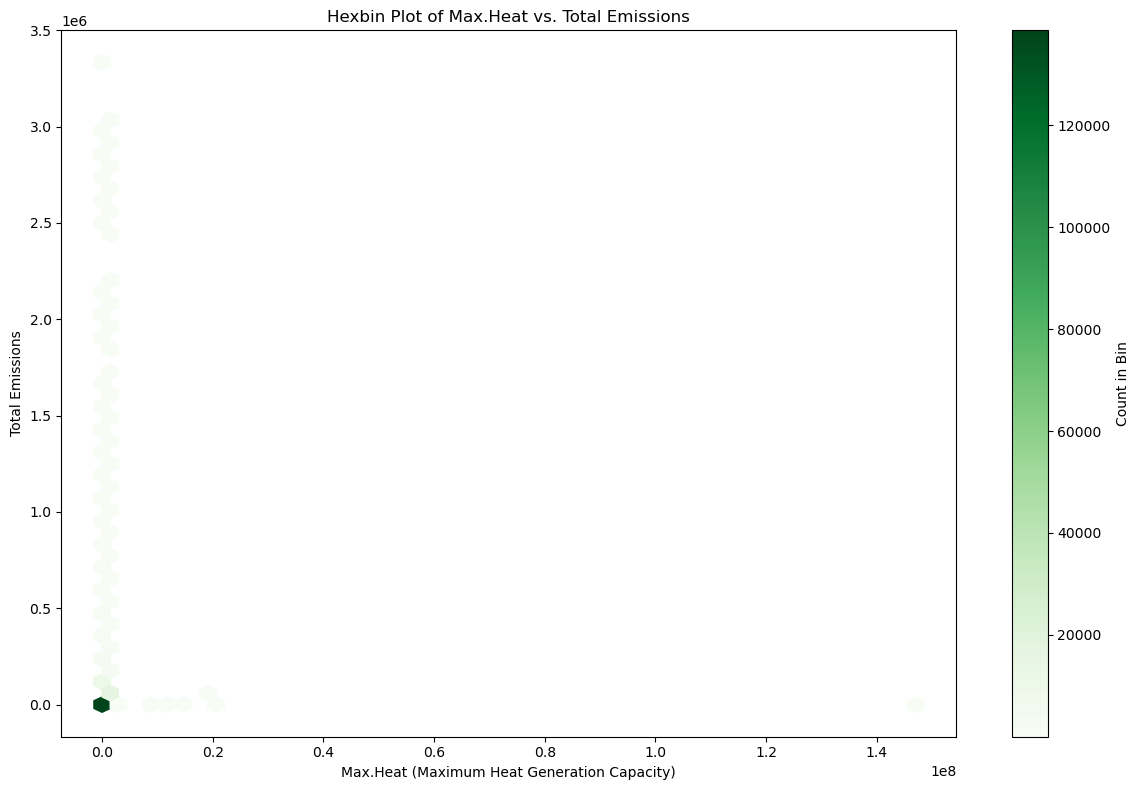

In [20]:
# Creating a hexbin plot to visualize the relationship between Max.Heat and Total Emissions
plt.figure(figsize=(12, 8))
plt.hexbin(unit_df['Max.Heat'], unit_df['Total.Emissions'], gridsize=50, cmap='Greens', mincnt=1)
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Max.Heat vs. Total Emissions')
plt.xlabel('Max.Heat (Maximum Heat Generation Capacity)')
plt.ylabel('Total Emissions')

plt.tight_layout()
plt.show()


**Note** Doesn't appear to be a helpful visualization

## Yearly Trends by Unit Type:

A line graph to explore how emissions from different Unit.Types have changed over the years. This could help in understanding trends and the impact of technological or regulatory changes over time.

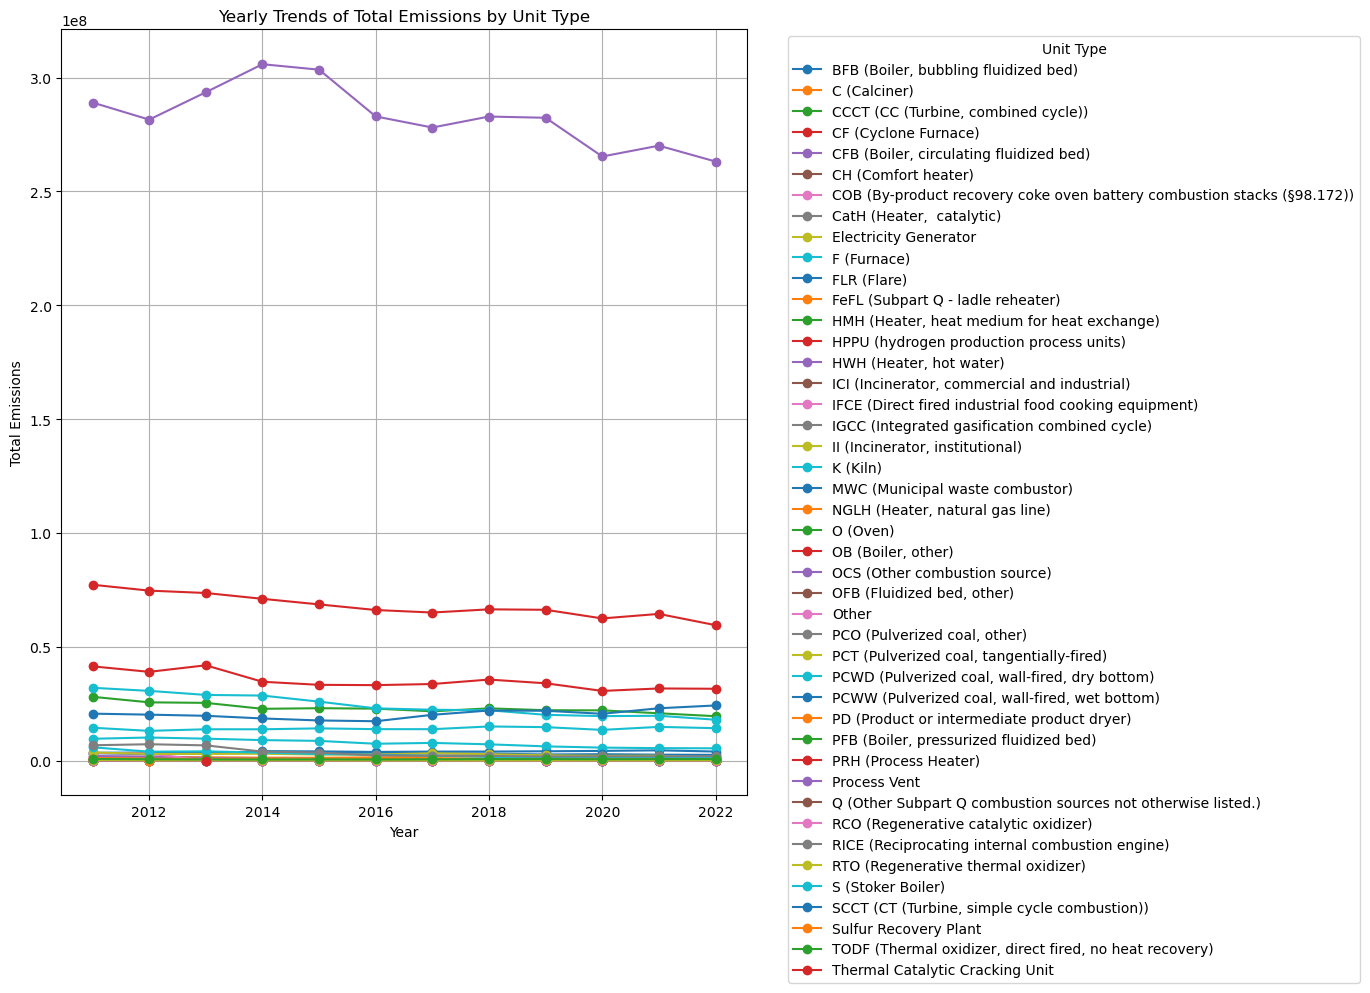

In [21]:
# Aggregating total emissions by Unit.Type and Year
unit_type_yearly_emissions = unit_df.groupby(['Unit.Type', 'Year']).agg({'Total.Emissions': 'sum'}).reset_index()

# Getting a list of unique Unit.Types for plotting
unique_unit_types = unit_type_yearly_emissions['Unit.Type'].unique()

# Plotting yearly trends of total emissions for different Unit.Types
plt.figure(figsize=(14, 10))

for unit_type in unique_unit_types:
    subset = unit_type_yearly_emissions[unit_type_yearly_emissions['Unit.Type'] == unit_type]
    plt.plot(subset['Year'], subset['Total.Emissions'], marker='o', label=unit_type)

plt.title('Yearly Trends of Total Emissions by Unit Type')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Unit Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


Lets limit the number of unit types to be more clear 

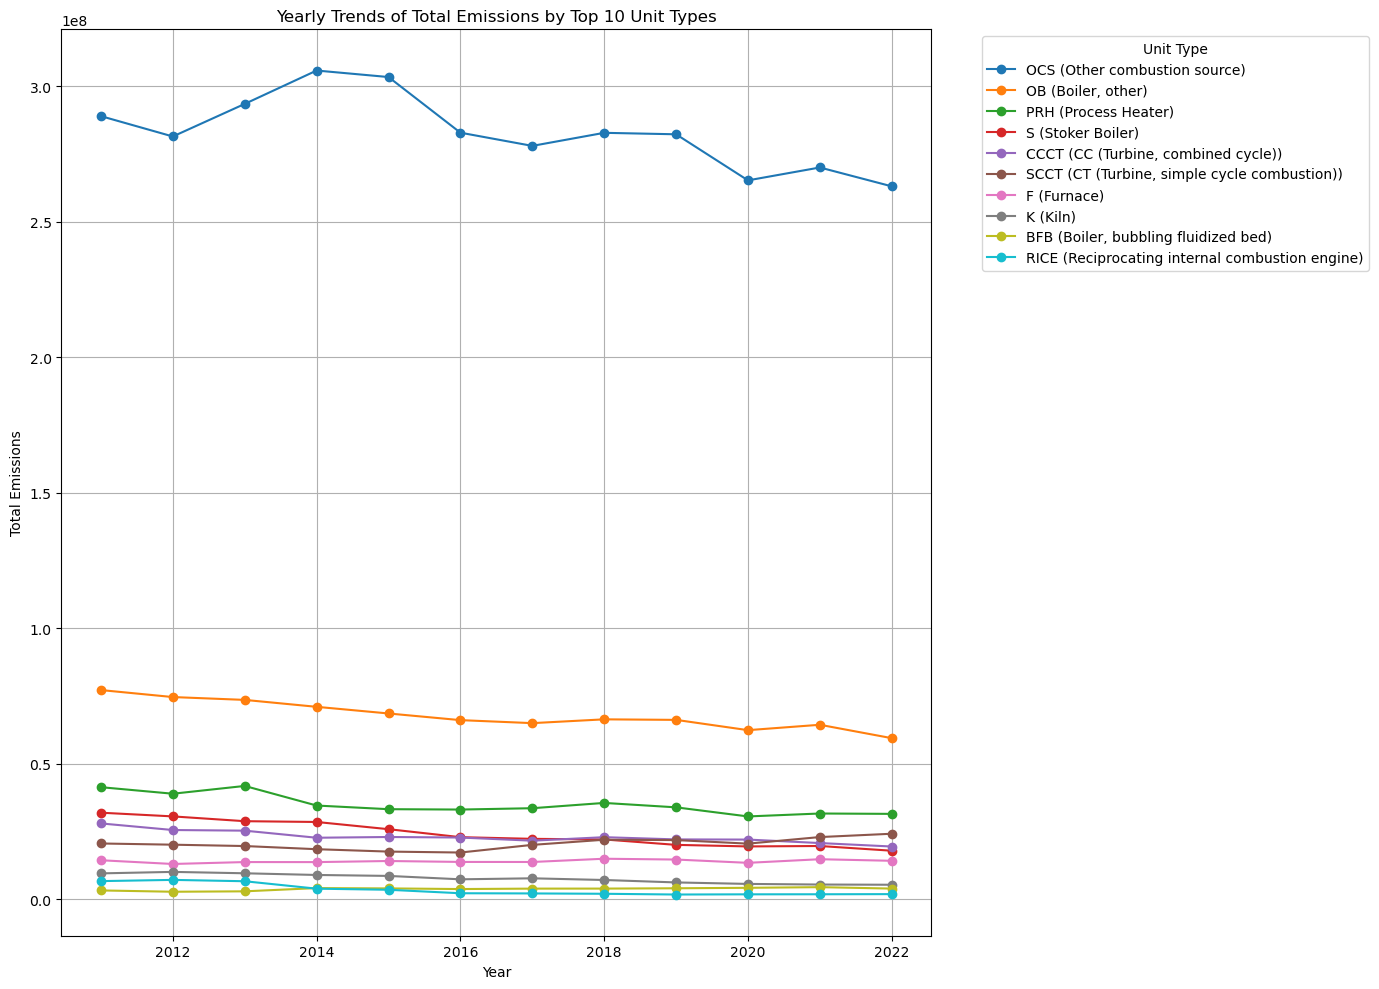

In [22]:
# Selecting the top 10 unit types based on total emissions across all years
top_10_unit_types_emissions = unit_type_emissions_sorted.head(10)['Unit.Type']

# Filtering the dataset to include only the top 10 unit types
top_10_unit_type_yearly_emissions = unit_type_yearly_emissions[unit_type_yearly_emissions['Unit.Type'].isin(top_10_unit_types_emissions)]

# Plotting yearly trends of total emissions for the top 10 Unit.Types
plt.figure(figsize=(14, 10))

for unit_type in top_10_unit_types_emissions:
    subset = top_10_unit_type_yearly_emissions[top_10_unit_type_yearly_emissions['Unit.Type'] == unit_type]
    plt.plot(subset['Year'], subset['Total.Emissions'], marker='o', linestyle='-', label=unit_type)

plt.title('Yearly Trends of Total Emissions by Top 10 Unit Types')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Unit Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()
